In [5]:
%%capture --no-stderr
%pip install -U langchain-nomic langchain_community tiktoken langchainhub langchain langgraph tavily-python langchain-text-splitters

  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-openai 0.0.5 requires langchain-core<0.2,>=0.1.16, but you have langchain-core 0.2.20 which is incompatible.
langchain-openai 0.0.5 requires tiktoken<0.6.0,>=0.5.2, but you have tiktoken 0.7.0 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Tracing (optional)

In [4]:
import os
import requests
import re
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import time

### LLM
local_llm = "llama3.1"

In [5]:
import praw
from collections import Counter

# Replace with your Reddit app credentials
CLIENT_ID = 'Q1q19TyBK8h519ZjBEXjUA'
CLIENT_SECRET = 'CHulvUzsOoddZl5PGf30b5bigw8U-A'
USER_AGENT = 'test'  # You can use any descriptive user agent

# Initialize PRAW with credentials
reddit = praw.Reddit(
    client_id=CLIENT_ID,
    client_secret=CLIENT_SECRET,
    user_agent=USER_AGENT
)


In [20]:
## get subreddits

import pandas as pd
def search_subreddits(query, limit_per_word=5):
    words = query.split(',')
    all_subreddits = []
    
    for word in words:
        try:
            subreddits = reddit.subreddits.search(word, limit=limit_per_word)
            all_subreddits.extend([subreddit.display_name for subreddit in subreddits])
        except Exception as e:
            print(f"Error searching subreddits with query '{word}': {e}")

    return list(set(all_subreddits))


query_text = "email marketing, coldemail, business leads, marketing "  # Replace with your query text
#subreddits = search_subreddits(query_text)



In [6]:
## get comments

import pandas as pd
def get_top_posts(subreddit_name, limit=3):
    try:
        subreddit = reddit.subreddit(subreddit_name)
        # Check if the subreddit exists by attempting to access its posts
        if subreddit.display_name != subreddit_name:
            raise Exception(f"Subreddit {subreddit_name} does not exist.")
        top_posts = subreddit.top(limit=limit)
        return list(top_posts)  # Convert to list
    except Exception as e:
        print(f"Error fetching top posts from {subreddit_name}: {e}")
        return []

def get_comments_from_post(post):
    try:
        post.comments.replace_more(limit=100)
        comments = [comment.body for comment in post.comments.list()]
        return comments
    except Exception as e:
        print(f"Error fetching comments from post {post.id}: {e}")
        return []

def scrape_reddit_comments(subreddits):
    all_comments = []
    failed_subreddits = []
    
    for subreddit_name in subreddits:
        print(f"Scraping subreddit: {subreddit_name}")
        top_posts = get_top_posts(subreddit_name)
        if not top_posts:  # Skip if no posts were retrieved
            failed_subreddits.append(subreddit_name)
            continue
        for post in top_posts:
            comments = get_comments_from_post(post)
            sub_comments= comments[:100]
            all_comments.extend(sub_comments)
    
    if failed_subreddits:
        print(f"Failed to retrieve data from these subreddits: {', '.join(failed_subreddits)}")
    
    return all_comments

def reddit_comments(sub_reddits):
    output_file=f"{sub_reddits}_comments.csv"
    subreddits = sub_reddits.split(',')
    subreddits = [sub.strip() for sub in subreddits]
    
    comments = scrape_reddit_comments(subreddits)
    print(comments)
    print(f"Total comments scraped: {len(comments)}")
    
    if comments:
        df = pd.DataFrame(comments, columns=['Comment'])
        df.to_csv(output_file, index=False)
        print(f"Comments for {subreddits} scraped and saved to {output_file}")
    else:
        print("No comments scraped from {subreddits}.")
    return comments



In [6]:
sub_reddits = "SaaS_Email_Marketing, ColdEmailAndSales, ColdEmailMasters, EmailMarketingIdeas,LeadGeneration, coldemail, smallbusiness, Emailmarketing"  # Provide subreddits here
    
comments= reddit_comments(sub_reddits)

Scraping subreddit: SaaS_Email_Marketing
Scraping subreddit: ColdEmailAndSales
Scraping subreddit: ColdEmailMasters
Scraping subreddit: EmailMarketingIdeas
Scraping subreddit: LeadGeneration
Scraping subreddit: coldemail
Scraping subreddit: smallbusiness
Scraping subreddit: Emailmarketing
['Looks like a cold email strategy so the problem is not content, it’s because unwanted emails. PS Remember there is no such thing as long or short content, only boring content.', '[deleted]', 'exactly!', '+1', 'How can these templates enhance customer service efficiency?', 'Save time and improve service quality with ready-made email templates.', 'Experiment with using templates to ensure consistent and accurate responses.', "I would say, for start-ups who don't have templates already saved on hand or part of their workflows, snippets, etc. This is a great jump start to ensure you have some verbiage ready to go for those first customers when they read out. Definitely basic, but there are a ton of comp

In [7]:
comments[:50]

['Looks like a cold email strategy so the problem is not content, it’s because unwanted emails. PS Remember there is no such thing as long or short content, only boring content.',
 '[deleted]',
 'exactly!',
 '+1',
 'How can these templates enhance customer service efficiency?',
 'Save time and improve service quality with ready-made email templates.',
 'Experiment with using templates to ensure consistent and accurate responses.',
 "I would say, for start-ups who don't have templates already saved on hand or part of their workflows, snippets, etc. This is a great jump start to ensure you have some verbiage ready to go for those first customers when they read out. Definitely basic, but there are a ton of companies starting up each day. \n\nMissing a CTA on the blog though, even just sign up for the newsletter!",
 '[removed]',
 'Yet another new learning. Thanks for sharing the knowledge and up skilling us.',
 'Hi, do you have any learning videos on scraping data from Linkedin sales Navig

In [8]:
from datetime import date

date.today()

datetime.date(2024, 8, 4)

In [ ]:
### Search
from langchain_community.tools.tavily_search import TavilySearchResults

web_search_tool = TavilySearchResults(k=2, max_results=4)
web_search_tool.invoke({"query": "public reviews about AI personalized cold Email writer for business leads. Writes emaiil for every lead by researching on them using their website and linkedin  "})

[{'url': 'https://www.emailvendorselection.com/best-ai-email-writer/',
  'content': '1. Jasper — Best for email content creation at scale. Jasper is an AI-powered writing assistant that helps businesses create marketing content, such as blog posts, social media posts, sales emails, and website copy. It has an email writer that can write email subject lines and email copy.'},
 {'url': 'https://linkub.io/blog/ai-email-writers/',
  'content': 'Ellie. Meet Ellie, the AI email assistant that learns from your writing style and crafts email replies as if you penned them. With the power of GPT-4, Ellie has already assisted over 33,999 users in crafting more than 56,577 email replies. Benefits: Crafts replies mimicking your writing style, ensuring authenticity.'},
 {'url': 'https://gravitywrite.com/blog/tools-for-ai-cold-emails',
  'content': "7. Warmer.ai. Warmer.ai is one of the top AI cold email tools on our list, specializing in crafting personalized emails quickly. By analyzing data from a

In [ ]:
from google_serper import serper_search

serper_search("subreddits about AI RAG chatbot for personal document chat")

"Title: [Personal AI/ML Project] Chatbot which can answer your document\nLink: https://www.reddit.com/r/LangChain/comments/16ouikv/personal_aiml_project_chatbot_which_can_answer/\nSnippet: Hi Folks,. During my free time doing personal project basically created a chatbot which can answer your question from document.\n---\nTitle: RAG-GPT: Chat with any documents and summarize long PDF files ...\nLink: https://www.youtube.com/watch?v=1FERFfut4Uw\nSnippet: RAG stands for Retrieval Augmented Generation and RAG-GPT is a powerful chatbot that ...\n---\nTitle: Fine-tuning myths / OpenAI documentation - API\nLink: https://community.openai.com/t/fine-tuning-myths-openai-documentation/133608\nSnippet: A very common use case for GPT involves question answering with external data. Wherever you look, people inquire about the best way to do ...\n---\nTitle: Chat with RTX Now Free to Download - NVIDIA Blog\nLink: https://blogs.nvidia.com/blog/chat-with-rtx-available-now/\nSnippet: Chat With RTX Brings

In [7]:
## subreddit name chain

from langchain_community.chat_models import ChatOllama, ChatOpenAI
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

# LLM
#llm = ChatOllama(model=local_llm, temperature=0.1)
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.1)

product = "AI personalized cold Email writer for business leads. Writes emaiil for every lead by researching on them using their website and linkedin "
# LLM
#llm = ChatOllama(model=local_llm,temperature=0.1)

subreddit_name_prompt = PromptTemplate(
    template=""" you are market researcher.
    
    Given the product information, understand the core product and the problem it solves.
    your task is to write five search words from the product that closely relates to the core product.\n\n
    
    
    such as:
    
    dog trainer
    medical billing
    ai chatbot
    
    
    
    Provide the keywords separated by comma and no preamble or explanation.
    
    
    
    product details: \n\n {product} \n\n 
    """,
    input_variables=[ "product"],
)


subreddit_name_chain = subreddit_name_prompt | llm | StrOutputParser()



#google_search=web_search_tool.invoke({"query": "latest {location} "})
#subreddit_name_agent= subreddit_name_chain.invoke({"product": product})
#print(subreddit_name_agent)

In [8]:
### Reddit Searcher Chain

from langchain_community.chat_models import ChatOllama, ChatOpenAI
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

# LLM
#llm = ChatOllama(model=local_llm, temperature=0.1)
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.1)

reddit_searcher_prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are a reddit expert. you have been given some subreddits.
    
    only provide best 7 (seven) subreddits that closely relates with the product information. Choose the sub reddits where we may find product users.
    do not create any name from yourself. 
    you have been given available subreddits from reddit search.
    choose only closely match with keywords of our product.
    
    Provide the subbreddits separated by comma without 'r/'. and no preamble or explanation.
    
    
    <|eot_id|><|start_header_id|>user<|end_header_id|>
    available subreddits:{sub_reddits}\n\n
    product: \n\n {product} \n\n <|eot_id|><|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=[ "product", "sub_reddits"],
)


subreddit_searcher_chain = reddit_searcher_prompt | llm | StrOutputParser()
#sub_reddits = search_subreddits(subreddit_name_agent)
#print(sub_reddits)

#google_search=web_search_tool.invoke({"query": "latest {location} "})
#subreddit_searcher_agent= subreddit_searcher_chain.invoke({"product": product, "sub_reddits":sub_reddits})
#print(subreddit_searcher_agent)


In [11]:
subreddit_searcher_agent

NameError: name 'subreddit_searcher_agent' is not defined

In [ ]:
comments= reddit_comments(subreddit_searcher_agent)

comments[:100]

Scraping subreddit: leads
Scraping subreddit: LeadGeneration
Scraping subreddit: Emailmarketing
Scraping subreddit: AutomatedMarketing
Scraping subreddit: marketing
Scraping subreddit: smallbusiness
Scraping subreddit: Entrepreneur
['I buy US energy deregulation leads', 'Oh ok. Bookkeeping services for small businesses, specializes in construction and skilled trades. https://www.instagram.com/psalmsbookkeeping?igsh=MzRlODBiNWFlZA==', 'If you find me clients and sign up for my services, ill compensate you.', 'Guys, if you want data to promote your Services /business, then I have all countries database - i also have usa 90million DataBase', 'Ah damn unfortunately I have only German leads.', 'I good only German leads, what’s your service about?', 'New feeds in!!\nNew leads for\nDebt\nMedicare\nDME\nACA\nAuto insurance\nAuto Warranty\nU65 Helath insurance\nLife Insurance\nRoofing\nHome improvement\nPersonal Loans\nMCA\nMVA\nConventional Refi\nVA Refi\nHome Purchase\nHome Seller\nReverse Mo

['I buy US energy deregulation leads',
 'Oh ok. Bookkeeping services for small businesses, specializes in construction and skilled trades. https://www.instagram.com/psalmsbookkeeping?igsh=MzRlODBiNWFlZA==',
 'If you find me clients and sign up for my services, ill compensate you.',
 'Guys, if you want data to promote your Services /business, then I have all countries database - i also have usa 90million DataBase',
 'Ah damn unfortunately I have only German leads.',
 'I good only German leads, what’s your service about?',
 'New feeds in!!\nNew leads for\nDebt\nMedicare\nDME\nACA\nAuto insurance\nAuto Warranty\nU65 Helath insurance\nLife Insurance\nRoofing\nHome improvement\nPersonal Loans\nMCA\nMVA\nConventional Refi\nVA Refi\nHome Purchase\nHome Seller\nReverse Mortage leads\n\nAll with Jornaya ID and TF\n\nDebt Leads\n0-30 days - $2\n30-60 days - $1\n\nMedicare and DME\n0-30 days - $3\n30-60 day - $2\n\nACA\n30-90 day - $2\n90-180 day - $1\nAuto Insurance\n0-30 day - $1\n30-60 day - .

In [9]:

from fuzzywuzzy import fuzz

def filter_comments(comments):
    unwanted_keywords = ['https']
    # Filter out comments containing unwanted keywords and comments with less than 4 words
    filtered_comments = []
    for comment in comments:
        if len(comment.split()) >= 4 and not any(keyword.lower() in comment.lower() for keyword in unwanted_keywords):
            filtered_comments.append(comment)

    # Remove comments with links
    filtered_comments = [comment for comment in filtered_comments if 'http' not in comment and 'https' not in comment]
    
    # Remove duplicate comments that are 80% similar or more
    def is_duplicate(comment, existing_comments, threshold=80):
        for existing_comment in existing_comments:
            if fuzz.ratio(comment, existing_comment) >= threshold:
                return True
        return False
    
    unique_comments = []
    for comment in filtered_comments:
        if not is_duplicate(comment, unique_comments):
            unique_comments.append(comment)
    
    return unique_comments

# List of unwanted keywords




# Filter the comments
#filtered_comments = filter_comments(comments)
#filtered_comments

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
len(filtered_comments)



841

In [ ]:
filtered_comments[:10]

['I buy US energy deregulation leads',
 'If you find me clients and sign up for my services, ill compensate you.',
 'Guys, if you want data to promote your Services /business, then I have all countries database - i also have usa 90million DataBase',
 'Ah damn unfortunately I have only German leads.',
 'I good only German leads, what’s your service about?',
 "It's not the most ethical thing to do.\n\nPeople do it.\n\nOnly a lawyer can tell you if it's legal in your case.",
 '135 up votes but not one comment on a Reddit post.... sus',
 'This update for Mystrika is definitely exciting! I’ve been using Mails.ai for my cold emailing needs, and it’s been fantastic. The AI integration is smooth, and I love how it creates personalized lines for each lead. It’s saved me so much time and effort. Setting it up was super easy too - just pop in your OpenAI API key and you’re good to go. If you’re looking for another option to boost your engagement, it might be worth checking out. Happy emailing!',


In [10]:
### Market Researcher Expert

from langchain_community.chat_models import ChatOllama, ChatOpenAI
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

# LLM
llm = ChatOllama(model=local_llm, temperature=0.1)
market_researcher_llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.1)


market_researcher_prompt = PromptTemplate(
    template="""
    ## My goal

I'm looking for customer insights for my business idea:
“{product} ”

## Your role

You are a market researcher expert in finding customer insights

## Your mission

I'm either going to provide you with a copy and paste of Reddit posts from related subreddits, or, a list of YouTube comments from a related video (or any type of document).

Please extract any gold nuggets that I can use in my marketing.

## Instructions and formatting

I want to have the exact customer wording, create a simple list, and list all of them.

Use a Markdown block dto display your answer, nothing before, nothing after.

## EXTREMELY IMPORTANT

- Only select the sentences that have a direct link to my business idea
- Only mention short impactful sentence with wording that every person in my audience can rely to.
- DO NOT WRITE ANY SENTENCE THAT HAS NOT A DIRECT LINK WITH MY BUSINESS IDEA

## Format example
[
## (Give a name to the pain point)
“Gold nugget related to the pain point”
“Gold nugget related to the pain point”
“Gold nugget related to the pain point”

## (Give a name to the pain point)
“Gold nugget related to the pain point”
“Gold nugget related to the pain point”
“Gold nugget related to the pain point”

... ]



## Document to work from

{filtered_comments}

   
    """,
    input_variables=["filtered_comments", "product"],
)


market_researcher_chain = market_researcher_prompt | market_researcher_llm | StrOutputParser()



#market_researcher_agent= market_researcher_chain.invoke({"filtered_comments":filtered_comments[:1000], "product": product})
#print(market_researcher_agent)

In [11]:
### Marketing Strategist Chain

from langchain_community.chat_models import ChatOllama, ChatOpenAI
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

# LLM
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.1)


marketing_strategist_prompt = PromptTemplate(
    template=""" 
    product: {product}\n
    Previous knowledge:
    {market_researcher_agent}\n
    
    
## Your rôle

You are a marketing strategist with a deep understanding of copywriting, psychological behaviors and Meta advertising.
You know perfectly the market analysis and advertising principles from 'Breakthrough Advertising' by Eugene M. Schwartz, and from David Ogilvy.

## Context

I’m in the process of validating a product idea using a Meta advertising campaign as well as a landing page.
At this stage, I only have very little knowledge about who is the customer and what do they really need., only the information previously mentioned in our conversation.

## Your mission

Your mission is to help me to craft the both the landing page and the advertising campaign by providing them with different potential target audiences, marketing angles and hooks, following the definitions and process described


## Methodology: Think step by step

1. Understand the insight provided earlier in this conversation
2. Think of potential markets the product/offer could address, the mass desires behind it, market awareness, and market sophistication
3. Think of the potential customers, who are they, what are they struggling with, what do they really want
4. Think of the best potential target audiences
5. Generate your answer

After gathering this information, generate a clear and simple product description that includes the following:

### Structure of your answer


Here is the structure to follow:

(

## Name

(Give it a nice but self explanatory name)

## Colors

(The background is going to be white, pick 1 HEX colors that fit the product, that should create a strong constrast to use on the call to action)

## Font

(Pick 2 Google fonts, one for heading, distinctive enough to create a real identity, and another more classic for paragraphs)

## Product

(Describe what the product is and what it does.)

### Features:

(List the 3 main potential features or components of the product.)

### Benefits

(Highlight the 3 potential key benefits the product provides.)

## Potential target audience

List 3 potenial niches/target audience for the product. From most important to least important

)

### Format

- [potential group of people] that are struggling with [a potential problem] that what to [achieve a potential goal]
- [potential group of people] that are struggling with [a potential problem] that what to [achieve a potential goal]
- ...

### Important

When picking an audience, be niche, be accurate, don't use broad useless audiences like "busy professional" or "health enthusiast", we want to address a specific part of a big market to solve a specific problem.
   
   
   all information in json with relevant keys. 
    
    
    """,
    input_variables=["market_researcher_agent", "product"],
)


marketing_strategist_chain = marketing_strategist_prompt | llm | JsonOutputParser()



#marketing_strategist_agent= marketing_strategist_chain.invoke({"market_researcher_agent": market_researcher_agent, "product": product})
#print(marketing_strategist_agent)
#target_audience= marketing_strategist_agent['Potential target audience'][0]

In [ ]:
print(marketing_strategist_agent)
target_audience= marketing_strategist_agent['Potential target audience'][2]
print(target_audience)

{'Name': 'LeadCraft AI', 'Colors': '#007BFF', 'Font': {'Heading': 'Montserrat', 'Paragraph': 'Roboto'}, 'Product': "LeadCraft AI is an AI-powered personalized cold email writer designed specifically for businesses looking to engage potential leads effectively. By researching each lead's website and LinkedIn profile, it crafts tailored emails that resonate with the recipient, increasing the chances of conversion.", 'Features': ["Automated Research: The AI analyzes leads' online presence to gather relevant information for personalization.", 'Customizable Templates: Users can choose from a variety of email templates that can be easily customized to fit their brand voice.', 'Performance Tracking: The tool provides analytics on email open rates, responses, and engagement metrics to optimize future outreach.'], 'Benefits': ['Time-Saving: Automates the email writing process, allowing users to focus on other critical business tasks.', 'Higher Engagement: Personalized emails lead to better resp

In [12]:
### Campaign Crafter Chain
import re
from langchain_community.chat_models import ChatOllama, ChatOpenAI
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

# LLM
#llm = ChatOllama(model=local_llm, temperature=0.1)
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.1)

prompt = PromptTemplate(
    template="""
    
    product: {product}\n
    
    Previous knowledge:
    {market_researcher_agent}\n
    
    {marketing_strategist_agent}\n
    
    
    
   From now on, only work with the following potential target audience:
    {target_audience}

## Your new mission

From all the informations in the conversation above, your new mission is to help the user to craft the campaign by providing them with:
- A more accurate definition of the chosen audience
- Their situation (related through market analysis from Breakthrough Advertising)
- Their deep pain point
- Their potential objections

## Structure

USE A MARKDOWN BLOCK TO WRITE YOUR ANSWER NOTHING BEFORE, NOTHING AFTER

Here is the structure to follow:

[

# [Audience Name]

[Expand the definition]
([potential group of people] that are struggling with [a potential problem] that what to [achieve a potential goal])

## Situation

*Market Desire:* (Identify the dominant desire the product fulfills, we are talking here of a deep desire (cf breakthrough advertising), not something obvious that the product does)

*Awareness Level:* (Determine how familiar the audience is with the problem, the solution, and the product.)

*Sophistication Level:* (Assess how familiar the audience is with competing solutions and how complex their needs are.)
(market desire: We are talking here of a deep desire (cf breakthrough advertising), not something obvious that the product does)
(awareness level & Sophistication level: Make it actionable one clear sentence with a quick advice to approach advertising (cf breakthrough advertising))

#### Deep pain point

(List the 3 main problem that [audience] is facing regarding [product])

#### Potential objection

(List the 3 potential objections that [audience] could have when it comes to buying [product])

]
    
    """,
    input_variables=["product", "comment_organizer_agent","copywriter_agent", "target_audience"],
)


# Chain
campaign_chain = prompt | llm | StrOutputParser()



#campaign_agent = campaign_chain.invoke({"product":product, "market_researcher_agent": market_researcher_agent,"marketing_strategist_agent":marketing_strategist_agent, "target_audience":target_audience})
#print(campaign_agent)

In [13]:
### Landing Page Chain
import re
from langchain_community.chat_models import ChatOllama, ChatOpenAI
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

# LLM
#llm_landing_page = ChatOllama(model=local_llm, temperature=0.1)
llm_landing_page = ChatOpenAI(model="gpt-4o-mini", temperature=0.1)

landing_page_prompt = PromptTemplate(
    template="""
    
    product: {product}\n
    
    Previous knowledge:
    
    {market_researcher_agent}\n
    
    {marketing_strategist_agent}\n
    
    Target Audince:
    {campaign_agent}\n\n

## Your new mission

From all the informations in the conversation above, your new mission is to help the user to craft the landing page to display the product/offer.
The landing page is using the Before-After-Bridge copywriting framework

IT IS EXTREMELY IMPORTANT THAT YOU USE THE WORDING OF THE CUSTOMER AS MUCH AS POSSIBLE IN YOUR COPY

### Think step by step

1. Summarize the conversation for yourself
2. Think of the potential target audience, who are the customers, what are their current believes, what are they struggling with, what do they really want, what have they potentially tried to solve the problem
3. Generate your answer

## Basic rules for crafting landing pages

- Be crystal clear in your writing - Don’t assume “they will understand”, write simple things, do not use metaphores.
- Write for a 10 years old - Avoid jargon at all cost use only simple words and formulation.
- Say everything in the titles, back it up with the paragraphs - Most people only scan the page, everything should be said only with the titles.
- No one cares about the product, people care about themselves - Write using “You” or “Your” not “Us”, customer centric.
- Write with one single person in mind.
- Create mental pictures as much as possible, the more the visitor visualize a situation they can relate to, the more likely they will understand the benefits the product can bring them.
- If possible, pick a side, declare an ennemy, it's us versus them, do it subltely.
- Never use buzzword, or power verbs like unleash, unveil, discover, unlock and all similar bullshit words

## Definitions
[
### Above the fold

The Above the fold part of the landing page is the first part the visitors sees when landing on the page, before scrolling. This section should should contain all the pieces, the visitor should understand they are in the right place in a blink of an oeil.
It contains the following pieces

#### Headline


ALWAYS USE THE WORDS OF THE CUSTOMERS IN THE HEADLINE
Here are 3 types of headlines that work well:

1. Short straight to the point headlines

Good short straight to the point headlines describe what the business does in a super creative way. They don't use buzzwords. They're short and consumable, while generating curiosity. They orient towards the business outcomes that customers would get. 

2. Question headlines

Question headlines are a simple question making the visitor directly connect to a specific situation or relate to a fact they know about, related to the problem the product/offer solves, If possible make the visitor visulaze a scene they are familiar with or trigger an emotion.

3. The desired outcome headlines

Desired outcome headlines are short and designed to make the visitor feel the emotion they would feel if they finally solve the problem the product/offer is solving. It's not about the direct benefits of the product/offer, it's about how would their life look like once the problem is solved and how would they feel about that


#### Subheadline

The subheadline is meant to be placed right below the headline and should describe the solution for the target audience in a more objective way so the visitor knows exactly what to expect. It should confirm the user expectation by mentioning clearly for who it is for and what the product/offer does, if possible by adding some uniqueness or time period, and always make it feel easy as a breath.

#### Bullet points

Generally, depending on the product/offer, the above the fold will contain 3-5 bullet points
They are short (about 15 words) and straight to the point stating a benefits the customer will get backed up with a feature from the product

Example: "
Learn how to relieve your jaw tension and feel refreshed and ready to face the day in the morning.
Experience deep relaxation and improved mobility in the jaw, head and neck area
Discover how a new jaw feeling fundamentally improves your quality of life.
"

#### Call to action

The call to action is the text of a button to go to the next step, it should be very short, and adapted to any kind of next step

Example:
"
- Tell me more!
- Yes, I want...
- Find out if [product] is made for you?
"

### Message from the founder

Since we don't have testimonial yet, this section is going to show a sentence from the founder to humanize and rationalize the product/offer, it should act as if it would be a testimonial but it's not, it is directly from the founder.


### The current situation (Before)

This section is the "Before" in the BAB copywriting framework.
It should described vividly the current situation and pain of the visitor, using visual words, creating images and linking them to the effect that these situation have on their life.
The goal is to clearly picture the life of the customer with the pain, and the believes they have, and what solution they already tried, so we can deconstruct these believes.

It contains:

#### A title grabbing attention

Like "Does any of this ring a bell?", "Do you know that?"


#### 3 title-paragraph blocks

All containing a short and vivid description of scene the customer can rely to, that shows them in the pain related to the product.
"Every night, you lie awake, your mind racing with worries. The insomnia keeps you tossing and turning, frustration building as the hours slip by without sleep."

### A Believes deconstruction block

The goal here is to get the customer where they are with one current belief, aknoledge it and explain why it is wrong.
Mention the solution they have tried to solve the problem, and back it up with scientific studies if possible, or with a statement.

#### Believes deconstruction - headline

It starts by a statement like "You are not alone", or "In fact 80% of the population..."

#### Believes deconstruction - paragraph

Then comes a short paragraph to further expand the headline.

### Message from the founder

Same principle as previous message

### Desired outcome (After)

This section is the "after" from the BAB copywriting framework.
It is the exact opposite of the "Before", it should describe how the customer's life would look like after they obtained the result provided by the product/offer.

Some clarification to avoid confusion:
"
Problem: Muscle tension creating pain
Solution: A course that teaches you to relax every muscle of your body
Benefits: Pain free, you feel better
Desired outcome: Finally play with your grankids and enjoy life on your own terms
"

It contains:

#### A title grabbing attention

Like "And now, imagine..."

#### 3 title-paragraph blocks

All containing a short description of the scene and a small text like "You start every morning positive and full of energy - You enjoy breakfast, are in a good mood and start the day with a positive attitude. This new morning routine will not only boost your self-confidence, but also improve your overall mood and boost your social and professional interactions."

### A new paradigm block

We deconstructed the customers believes earlier in the page, now it's time to reconstruct new believes by introducing something they haven't thought about before,a new way,  a new vehicule to move from the place they are to the place they want to be. We are not introducing the solution or the product yet, only 

##### New paradigm - Healdline

Should be directly related to the "Believes deconstruction"

Here is an example: "Introducing [Product] A new way...

##### New paradigm - paragraph

Backing up the headline, explaining why this solution is different and can make a real change, based on the secret sauce
Not only we explain it but we want the solution to feel like it's a new paradigm, a new solution that is going to solve their problem.
Following the deconstruction of the believes, the construction of the new ones, and the introduction of the uniqueness of the solution, the paragraph should rationalize the excitment of finding out this new believe by facts, if possible backed up by science


#### Solution 3-Steps blocks

Each of these blocks are made from a Title and a short paragraph.
Depending on the product/offer, it can be a 3-steps blocks showing the different steps to get from current to new situation, or, if it is not possible, the blocks should emphasize the benefits of the solution, backed up by the features of the solution


### Message from the founder

Same principle as previous message


### Connection block

This block is made to define the WHY behing the product/offer, while, at the same time, creating a connection between the founder and the customer.
It is made with a Picture of the founder, a catchy headline and a paragraph

#### Connection block headline

Own words of the founders shortly explaining why the idea of creating this new product came up

#### Connection block paragraph

A semi-long paragraph telling the story and experience of the founder leading them to create the solution, in their own words.

### Last call to action

At this step, the customer went through all the emotion phases, and understand perfectly what the product/offer does, and how it will change their life.
This block is the last push to rationally make them take the next step.

#### Last call to action Headline

A short sentence pushing on the timing to change, to take the next step

#### Last call to action Subheadline

A short sentence backing up the headline

#### Last call to action CTA

A clear action (button text)
]



### The format of your answer

DO NOT USE EMOJIES
USE A MARKDOWN BLOCK TO WRITE YOUR ANSWER NOTHING BEFORE, NOTHING AFTER
JUST WRITE THE ANSWER (e.g. do not write "Hook 1: This is the hook", instead write: This is the hook)

Example format for the campaign structure:

[
Title: Landing page for [Product/offer name]
- Above the fold
	- Headline
		- Short straight to the point headlines
			- [Short straight to the point headline version 1]
			- [Short straight to the point headline version 2]
		- Question headlines
			- [Question headline version 1]
			- [Question headline version 2]
		- Desired outcome headlines
			- [Desired outcome headline version 1]
			- [Desired outcome headline version 2]
	- Subheadline
		- [Subheadline version 1]
		- [Subheadline version 2]
	- Bullet points
		- [Bullet point 1]
		- [Bullet point 2]
		- [Bullet point 3]
		- [Bullet point 4]
		- [Bullet point 5]
		- [Bullet point 6]
	- Call to action
		- [Call to action version 1]
		- [Call to action version 2]
		- [Call to action version 3]
- Message from the founder
	- [Message from the founder]
- The current situation
	- Title grabbing attention
		- [Title grabbing attention version 1]
		- [Title grabbing attention version 2]
	- Title-paragraph blocks
		- [Title-paragraph block version 1]
		- [Title-paragraph block version 2]
		- [Title-paragraph block version 3]
		- [Title-paragraph block version 4]
- Believes deconstruction block
	- Believes deconstruction - headline
		- [Believes deconstruction - headline]
	- Believes deconstruction - paragraph
		- [Believes deconstruction - paragraph]
- Message from the founder
	- [Message from the founder]
- Desired outcome
	- Title grabbing attention
		- [Title grabbing attention version 1]
		- [Title grabbing attention version 2]
	- Title-paragraph blocks
		- [Title-paragraph block version 1]
		- [Title-paragraph block version 2]
		- [Title-paragraph block version 3]
		- [Title-paragraph block version 4]
- New paradigm block
	- New paradigm - headline
		- [New paradigm - headline]
	- New paradigm - paragraph
		- [New paradigm - paragraph (Starting with for example: "this is not just another..." This section is about how this new solution will help the customer, don't use "our product", about 70 words)]
- Solution
	- Solution 3-Steps blocks
			- [Solution 3-Steps block 1 ]
			- [Solution 3-Steps block 2]
			- [Solution 3-Steps block 3]
- Message from the founder
	- [Message from the founder]
- Connection block
		- [Connection block headline]
		- [Connection block paragraph]
- Last call to action
		- [Last call to action Headline]
		- [Last call to action Subheadline]
		- [Last call to action CTA]
]    
    """,
    input_variables=["product","market_researcher_agent","marketing_strategist_agent", "campaign_agent"],
)


# Chain
landing_page_chain = landing_page_prompt | llm_landing_page | StrOutputParser()



#landing_page_agent = landing_page_chain.invoke({"product":product, "market_researcher_agent":market_researcher_agent,"marketing_strategist_agent":marketing_strategist_agent, "campaign_agent":campaign_agent})
#print(landing_page_agent)

In [1]:
### Router

from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate

# LLM
llm = ChatOllama(model=local_llm, format="json", temperature=0)

prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are an expert websearcher.
    you have been provided with google search results for a location. summarizer the information to pass it to email writer.  
    or 'vectorstore' based on the question. Return the a JSON with a single key 'datasource' and 
    no premable or explanation. Question to route: {question} <|eot_id|><|start_header_id|>assistant<|end_header_id|>""",
    input_variables=["question"],
)

question_router = prompt | llm | JsonOutputParser()
question = "llm agent memory"

doc_txt = docs[1].page_content
print(question_router.invoke({"question": question}))

ModuleNotFoundError: No module named 'langchain_community'

We'll implement these as a control flow in LangGraph.

In [21]:
from pprint import pprint
from typing import List
from termcolor import colored
from langchain_core.documents import Document
from typing_extensions import TypedDict

from langgraph.graph import END, StateGraph, START
from datetime import date


### State


class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
            product: str
            sub_reddits_to_search: str
            sub_reddits_to_scrape: List[str]
            comments: str
            market_research: str
            marketing_strategy: str
            campaign: str
    """

    product: str
    sub_reddits_to_search: str
    sub_reddits_to_scrape: str
    comments: str
    market_research: str
    marketing_strategy: dict
    target_audience: dict
    campaign: str
    landing_page: str
   
    
    
    
 


### Nodes


def subreddit_to_search(state):
    """
    
    """
    print(colored(f"---POSSIBLE SUB REDDITS---", 'green'))
    
    product = state["product"]

    subreddit_name_agent= subreddit_name_chain.invoke({"product": product})
    print(subreddit_name_agent)
    
    
    return {"sub_reddits_to_search": subreddit_name_agent}


def subreddit_selector(state):
    """
    
    """
    
    print(colored(f"\n\n ---SUB-REDDITS SELECTOR---", 'green'))
    sub_reddits_to_search = state["sub_reddits_to_search"]
    product= state["product"]
   
    
    sub_reddits = search_subreddits(sub_reddits_to_search)
    

    #google_search=web_search_tool.invoke({"query": "latest {location} "})
    subreddit_searcher_agent= subreddit_searcher_chain.invoke({"product": product, "sub_reddits":sub_reddits})
    print(subreddit_searcher_agent)
    print(colored(f"\nSub Reddits:\n\n {subreddit_searcher_agent} ", 'green'))
    
    return {"sub_reddits_to_scrape": subreddit_searcher_agent}


def market_researcher(state):
    """
    
    """
    
    print(colored(f"\n---MARKET RESEARCHER---", 'green'))
    subreddits_to_scrape = state["sub_reddits_to_scrape"]
    product = state["product"]
    

    # summary generation
    comments= reddit_comments(subreddits_to_scrape)
    
    print(colored(f"\n---Filtering Comments---", 'blue'))
    
    filtered_comments= filter_comments(comments)
    market_researcher_agent= market_researcher_chain.invoke({"filtered_comments":filtered_comments[:1000], "product": product})
    return { "market_research": market_researcher_agent}



def market_strategist(state):
    """
    
    """
    
    print(colored(f"\n---MARKET STRATEGIST---", 'green'))
    market_research = state["market_research"]
    product = state["product"]
    

    # summary generation
    marketing_strategist_agent= marketing_strategist_chain.invoke({"market_researcher_agent": market_research, "product": product})
    print(marketing_strategist_agent)
    target_audience= marketing_strategist_agent['Potential target audience']
    
    return { "marketing_strategy": marketing_strategist_agent, "target_audience":target_audience}


    
    




def human_in_loop(state):
    """
    A function to select the target audience.
    """

    print(colored(f"\n---SELECT AUDIENCE ---", 'green'))

    target_audience = state["target_audience"]

    
    one = target_audience[0]
    two = target_audience[1]
    three = target_audience[2]
    
    input_msg = (
        f"Choose one number:\n 1. {one}\n\n  2. {two}\n\n  3. {three}\n"
    )

    selected_audience = input(input_msg)

    if selected_audience == '1':
        return {"target_audience": one}
    elif selected_audience == '2':
        return {"target_audience": two}
    elif selected_audience == '3':
        return {"target_audience": three}
    else:
        return {"target_audience": one}






 
    
    
    
    



def campaign_crafter(state):
    """
    
    """
    
    print(colored(f"\n---CAMPAIGN CRAFTER---\n\n", 'green'))
    market_research = state["market_research"]
    marketing_strategy = state["marketing_strategy"]
    target_audience= state["target_audience"]
    product = state["product"]
    
    print(colored(f"Target Audience:\n {target_audience}", 'blue'))

    # summary generation
    campaign_agent = campaign_chain.invoke({"product":product, "market_researcher_agent": market_research,"marketing_strategist_agent":marketing_strategy, "target_audience":target_audience})

    return { "campaign": campaign_agent}


def landing_page_generator(state):
    """
    
    """
    
    print(colored(f"\n---LANDING_PAGE_GENERATOR---", 'green'))
    market_research = state["market_research"]
    marketing_strategy = state["marketing_strategy"]

    product = state["product"]
    campaign_agent = state["campaign"]
    

    # summary generation
    landing_page_agent = landing_page_chain.invoke({"product":product, "market_researcher_agent":market_research,"marketing_strategist_agent":marketing_strategy, "campaign_agent":campaign_agent})

    return { "landing_page": landing_page_agent}




 
 




In [22]:
workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("subreddit_to_search", subreddit_to_search)  # 
workflow.add_node("subreddit_selector",subreddit_selector)  # 
workflow.add_node("market_researcher", market_researcher)
workflow.add_node("market_strategist", market_strategist)  # 
workflow.add_node("human_in_loop", human_in_loop)
workflow.add_node("campaign_crafter",campaign_crafter)  # 

workflow.add_node("landing_page_generator", landing_page_generator)


# Edges
workflow.set_entry_point("subreddit_to_search")
workflow.add_edge("subreddit_to_search","subreddit_selector")


workflow.add_edge("subreddit_selector","market_researcher")
workflow.add_edge("market_researcher","market_strategist")

workflow.add_edge("market_strategist", "human_in_loop")

workflow.add_edge("human_in_loop", "campaign_crafter")

workflow.add_edge("campaign_crafter", "landing_page_generator")

workflow.add_edge("landing_page_generator", END)



# Compile
app = workflow.compile()

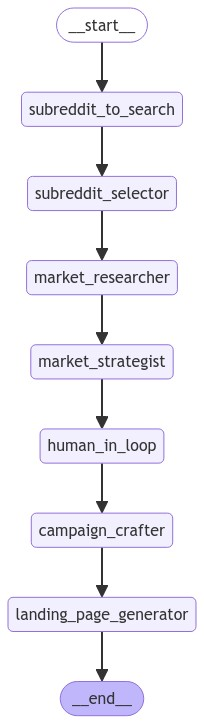

In [17]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [18]:
product = "DrChrono’s Revenue Cycle Management (RCM) can help you maintain income stability while simultaneously giving you more time to focus on patients. Our team of dedicated billing experts, in-house coding compliance officers, and certified medical coders handle the complete lifecycle of your medical claims. With this expertise in your corner, you will see an improvement of clean claim rates, speedy turnaround on denials, and improved cash flow. DrChrono works to take over time-consuming tasks while providing high-quality services at a fraction of a cost of in-house billing, to allow you to practice medicine, not administration."

inputs = {"product": product}

### Graph Build

In [ ]:
for output in app.stream(inputs):
    for key, value in output.items():
        pprint(f"Finished running: {key}:")
pprint(value["landing_page"])

In [23]:

output = app.invoke(inputs)

landing_page= output['landing_page']

print(colored(f"Landing Page:", 'green'))
print(colored(f"\nMessage: {landing_page}", 'cyan'))

---POSSIBLE SUB REDDITS---
revenue cycle management, medical billing, claims processing, cash flow improvement, coding compliance


 ---SUB-REDDITS SELECTOR---
medicalcodingtraining, Medical_Billing, Themedicalbilling, CodingandBilling, HealthcareFinance, medicine, VeteransBenefits

Sub Reddits:

 medicalcodingtraining, Medical_Billing, Themedicalbilling, CodingandBilling, HealthcareFinance, medicine, VeteransBenefits 

---MARKET RESEARCHER---
Scraping subreddit: medicalcodingtraining
Scraping subreddit: Medical_Billing
Scraping subreddit: Themedicalbilling
Scraping subreddit: CodingandBilling
Scraping subreddit: HealthcareFinance
Scraping subreddit: medicine
Scraping subreddit: VeteransBenefits
["Hello, Hope everyone's day is going well. \nI completed a medical billing and coding coursework way back in 2011, and got a CBCS certification from the NHA. (not the best coding certification, I am guessing). After a coding internship, I ended up taking an unrelated job path, but now I would 

In [ ]:

print(colored(f"Landing Page:", 'green'))
print(colored(f"\nMessage: {landing_page}", 'cyan'))

Landing Page:

Message: ```
Title: Landing page for DocuAI Chatbot
- Above the fold
	- Headline
		- "Struggling to understand your legal and financial documents?"
		- "Do you wish document management was easier?"
		- "Imagine making informed decisions without document stress."
	- Subheadline
		- "DocuAI Chatbot helps small business owners like you quickly find answers in your documents."
		- "Get clear, accurate responses about your documents effortlessly."
	- Bullet points
		- "Quickly locate essential information without sifting through pages."
		- "Understand complex documents with easy-to-follow explanations."
		- "Save time and focus on what really matters for your business."
		- "Seamlessly integrates with your existing document formats."
		- "User-friendly interface designed for effortless interaction."
		- "Gain confidence in your document management process."
	- Call to action
		- "Get started now!"
		- "Find out how it works!"
		- "See if DocuAI is right for you!"
- Message f